# Analyzing Text in Consumer Complaint Narratives


In [4]:
# Read in data from pandas
import pandas as pd

# This is used for fast string concatination
from io import StringIO

# Use nltk for valid words
import nltk
# Need to make hash 'dictionaries' from nltk for fast processing
import collections as co


import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Read the input
d = pd.read_csv("complaints.csv") # the consumer dataset is now a Pandas DataFrame
# Only interested in data with consumer complaints


In [8]:
d=d[d['Consumer complaint narrative'].notnull()]
d=d[d["Product"] == 'Mortgage']

In [12]:
d=d[d["Issue"] == 'Loan modification,collection,foreclosure']
d.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
23849,2016-08-09,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,My Servicer is attempting to foreclose on my h...,NaN,Ocwen Financial Corporation,NY,107XX,Older American,Consent provided,Web,2016-08-11,Closed with explanation,Yes,No,2052917
48140,2016-01-23,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XXXX I entered into a mortgage modifaction ...,Company believes complaint is the result of an...,Ocwen Financial Corporation,NJ,NaN,NaN,Consent provided,Web,2016-01-23,Closed with explanation,Yes,No,1755052
49500,2016-10-26,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,I am so devastated and so very disappointed wi...,Company believes it acted appropriately as aut...,North Dakota Housing Finance Agency,ND,NaN,NaN,Consent provided,Web,2016-11-18,Closed with explanation,Yes,No,2180679
78118,2017-04-18,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,"I lost my job in XXXX , I contacted the Hom...",Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MS,392XX,NaN,Consent provided,Web,2017-04-18,Closed with explanation,Yes,No,2438362
79019,2015-09-10,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,They locked me out of my house without notice....,Company believes the complaint is the result o...,"ClosingMark Financial Services, LLC",MT,NaN,NaN,Consent provided,Web,2015-09-10,Closed with explanation,Yes,Yes,1559959
93575,2017-02-11,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,I was served a summons for foreclosure from my...,NaN,RUSHMORE LOAN MANAGEMENT SERVICES LLC,NJ,NaN,NaN,Consent provided,Web,2017-02-11,Closed with explanation,Yes,No,2339828
93872,2015-09-22,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,I have had many problems with Ocwen trying to ...,NaN,Ocwen Financial Corporation,TX,760XX,NaN,Consent provided,Web,2015-09-22,Closed with explanation,Yes,No,1575262
94382,2015-03-23,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,"Hello, I 'm having issues with my mortgage com...",NaN,WELLS FARGO & COMPANY,PA,191XX,NaN,Consent provided,Web,2015-03-23,Closed with explanation,Yes,No,1295616
96143,2015-08-04,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,"XX/XX/XXXX medical hardship, one month delinqu...",Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",CT,NaN,Older American,Consent provided,Web,2015-08-04,Closed with explanation,Yes,No,1501991
115528,2016-01-25,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,Filed for bankruptcy in 2010 with the promise ...,NaN,Ocwen Financial Corporation,VA,232XX,NaN,Consent provided,Web,2016-01-25,Closed with explanation,Yes,No,1757248


In [13]:
# We want a very fast way to concat strings.
#  Try += if you don't believe this method is faster.
s=StringIO()
d['Consumer complaint narrative'].apply(lambda x: s.write(x))

k=s.getvalue()
s.close()
k=k.lower()
k=k.split()

In [14]:
#nltk.download('stopwords')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [15]:

# Next only want valid strings
words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
k=[i for i in k if i in words and i not in stopWords]
s=" ".join(k)
c = co.Counter(k)

## At this point we have k,s and c
**k** Array of words, with stop words removed

**s** Concatinated string of all comments

**c** Collection of words

In [16]:
# Take a look at the 14 most common words
c.most_common(14)

[('loan', 19879),
 ('mortgage', 16781),
 ('modification', 12468),
 ('would', 11156),
 ('home', 10700),
 ('bank', 9322),
 ('told', 8529),
 ('received', 7533),
 ('foreclosure', 7490),
 ('payment', 7259),
 ('get', 6989),
 ('time', 6825),
 ('us', 6491),
 ('sent', 6130)]

In [17]:
s[0:100]

'foreclose however satisfaction mortgage county ask judge erroneous satisfaction waiting county offic'

In [18]:
print(k[0:10],"\n\nLength of k %s" % len(k))

['foreclose', 'however', 'satisfaction', 'mortgage', 'county', 'ask', 'judge', 'erroneous', 'satisfaction', 'waiting'] 

Length of k 897112


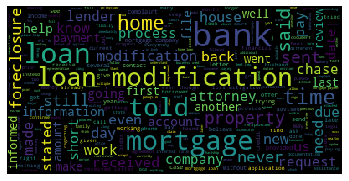

In [21]:
from wordcloud import WordCloud

# Read the whole text.
text = s

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="black",max_words=len(k),max_font_size=40, relative_scaling=.8).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Taking a look at their stories
These stories claim to involve identity theft and or fraud.


In [22]:
# Let's get some text involving identity theft
searchS='loan modification'
vi = d[d['Consumer complaint narrative'].str.find(searchS) >= 0]
d['victim']=None
d['e']=1
d['m']=None  # This will be for 'Closed with monetary relief'
d['victim'] = d[d['Consumer complaint narrative'].str.find(searchS) >= 0]
d['m']=d[d['Company response to consumer'] == 'Closed with monetary relief']


# Take a look at some sample stories  mindex to mindex_inc
# Adjust this, to see different stories
mindex=20
mindex_inc=5+mindex
si=StringIO()
vi['Consumer complaint narrative'].iloc[mindex:mindex_inc].apply(lambda x: si.write(x+'\n___\n\n'))

t=si.getvalue()
si.close()
print(t)

XXXX   XXXX  I wanted to explain our circumstances in this situation. My husband had a   XXXX   XXXX   XXXX   and we missed  one m ortgage payment. Made a deal with the bank to pay an additional {$200.00} per month. Which we did. Bank called  one day  saying they were no longer accepting our payments. My husband insisted on paying any way. The bank called again to advise they were n't accepting any mortgage payments. I asked where are the  3 pay ment I sent. The bank said they had no idea where that money was. So we did stop making payments since the bank was playing some type of game. A few months later we received a summons that they were starting foreclosure. We called the bank and they said do n't worry about appearing in court, this is just to verify we were living here. They advised us to try a loan modification, which we did. Then there attorneys contacted us with a three-month trial modification which we did. Paid them {$250.00} and them {$250.00} for 3 months to the bank. Afte

In [23]:
# We might be missing data on just fraud...
# Search for all cases of theft or fraud
searchS0='victim'
searchS1='identity'
searchS_OR=['theft','fraud']

vi2 = d[(d['Consumer complaint narrative'].str.find(searchS0) >= 0) &
        (d['Consumer complaint narrative'].str.find(searchS1) >= 0) &
       ( (d['Consumer complaint narrative'].str.find(searchS_OR[0]) >= 0) |
        (d['Consumer complaint narrative'].str.find(searchS_OR[1]) >= 0))
        ]

In [24]:
# vi2.count()

g=vi2.groupby(['Issue'])
gg=g.count().reset_index()
gg.sort_values(by='e',inplace=True)
gg=g['e','victim','m'].count().reset_index()
gg.sort_values(by='e',inplace=True, ascending=False)

In [25]:
# Taking a look at common complaints
# Need to format this...but note only 9 cases where it
# was "Closed with monetary relief"  m==1

#gg.head(4)
with pd.option_context('display.max_rows', 10, 'display.max_columns', 4):
    print(gg)

                                      Issue  e  victim  m
0  Loan modification,collection,foreclosure  9       3  0
